Execution Times:
Bubble Sort: 0.052636 seconds
Merge Sort: 0.005624 seconds
Quick Sort: 0.002664 seconds


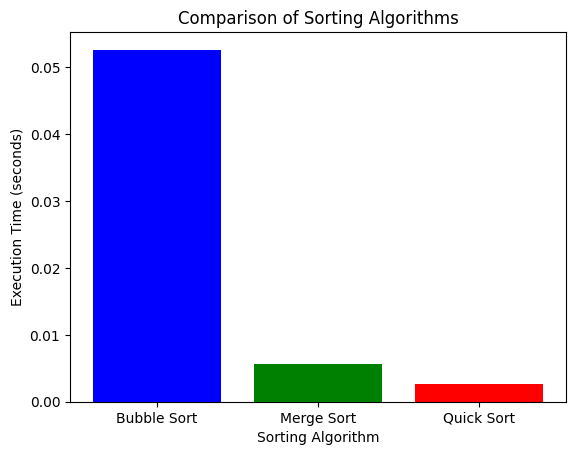

'\nBubble Sort: O(n^2) - Inefficient for large datasets due to nested loops.\nMerge Sort: O(n log n) - Efficient and stable, suitable for large datasets.\nQuick Sort: O(n log n) on average - Fastest in practice but has a worst-case of O(n^2).\nThe graph shows that Bubble Sort is significantly slower than Merge Sort and Quick Sort.\n'

In [ ]:
#Topic 1: Fundamentals of DSA
# Task 1: Analyzing Time Complexity of Algorithms 

import random
import time
import matplotlib.pyplot as plt

# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

# Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Generate random list of 1000 integers
random_list = [random.randint(0, 10000) for _ in range(1000)]

# Measure execution times
execution_times = {}

# Bubble Sort
bubble_list = random_list.copy()
start_time = time.time()
bubble_sort(bubble_list)
execution_times['Bubble Sort'] = time.time() - start_time

# Merge Sort
merge_list = random_list.copy()
start_time = time.time()
merge_sort(merge_list)
execution_times['Merge Sort'] = time.time() - start_time

# Quick Sort
quick_list = random_list.copy()
start_time = time.time()
quick_sort(quick_list)
execution_times['Quick Sort'] = time.time() - start_time

# Print execution times
print("Execution Times:")
for algo, exec_time in execution_times.items():
    print(f"{algo}: {exec_time:.6f} seconds")

# Plot execution times
plt.bar(execution_times.keys(), execution_times.values(), color=['blue', 'green', 'red'])
plt.xlabel('Sorting Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Sorting Algorithms')
plt.show()


Execution Times:
Recursive: [0.0, 0.0, 0.12807297706604004, 16.97379159927368]
Iterative: [0.0, 0.0, 0.0, 0.0]
Memoized: [0.0, 0.0, 0.0, 0.0]


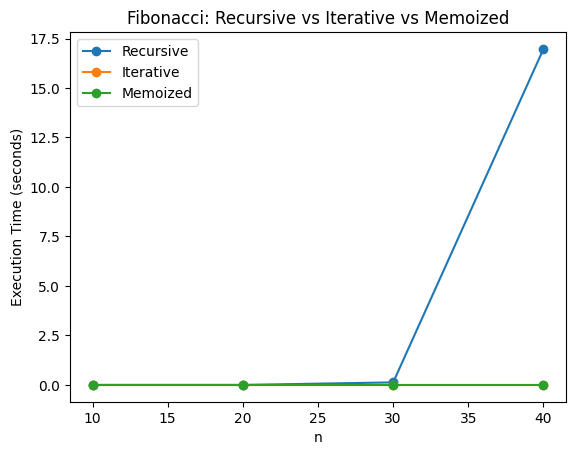

In [4]:
import time

# Task 2: Recursive vs Iterative Approach 

def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

def fibonacci_iterative(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

def fibonacci_memoized(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fibonacci_memoized(n-1, memo) + fibonacci_memoized(n-2, memo)
    return memo[n]

n_values = [10, 20, 30, 40]
execution_times = {'Recursive': [], 'Iterative': [], 'Memoized': []}

for n in n_values:
    start = time.time()
    fibonacci_recursive(n)
    execution_times['Recursive'].append(time.time() - start)

    start = time.time()
    fibonacci_iterative(n)
    execution_times['Iterative'].append(time.time() - start)

    start = time.time()
    fibonacci_memoized(n)
    execution_times['Memoized'].append(time.time() - start)

print("Execution Times:")
for method, times in execution_times.items():
    print(f"{method}: {times}")

plt.plot(n_values, execution_times['Recursive'], label='Recursive', marker='o')
plt.plot(n_values, execution_times['Iterative'], label='Iterative', marker='o')
plt.plot(n_values, execution_times['Memoized'], label='Memoized', marker='o')
plt.xlabel('n')
plt.ylabel('Execution Time (seconds)')
plt.title('Fibonacci: Recursive vs Iterative vs Memoized')
plt.legend()
plt.show()

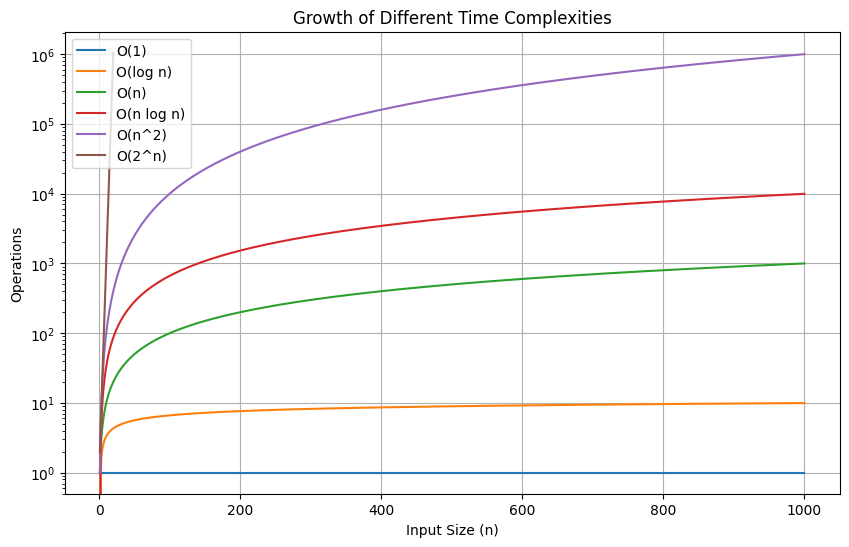

In [5]:
import numpy as np

# Task 3: Visualizing Big-O Notation 

def constant(n):
    return np.ones_like(n)

def logarithmic(n):
    return np.log2(n)

def linear(n):
    return n

def linearithmic(n):
    return n * np.log2(n)

def quadratic(n):
    return n**2

def exponential(n):
    return 2**n

input_sizes = np.arange(1, 1001)

complexities = {
    "O(1)": constant(input_sizes),
    "O(log n)": logarithmic(input_sizes),
    "O(n)": linear(input_sizes),
    "O(n log n)": linearithmic(input_sizes),
    "O(n^2)": quadratic(input_sizes),
    "O(2^n)": exponential(input_sizes[:20])
}

plt.figure(figsize=(10, 6))
for label, values in complexities.items():
    plt.plot(input_sizes[:len(values)], values, label=label)

plt.yscale('log')
plt.xlabel('Input Size (n)')
plt.ylabel('Operations')
plt.title('Growth of Different Time Complexities')
plt.legend()
plt.grid(True)
plt.show()
